<a href="https://colab.research.google.com/github/katarro/Tarea-1-Ia/blob/main/Copia_de_Tarea_1_Ia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 1

Usando la librería bnlearn y un dataset de su elección, aprenda la estructura de una red bayesiana en función de esos datos y caracterice los parámetros y elementos de la red obtenida .

In [ ]:
!pip install bnlearn

In [6]:
import pandas as pd
import bnlearn as bn
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Cara el archivo .csv en un DataFrame de Pandas
data = pd.read_csv('/content/adult.csv', index_col=0, encoding='latin-1', error_bad_lines=False)

In [ ]:
#visualiza la carga del dataset
print(data.head())

In [ ]:
# Aprender la estructura de la red bayesiana
model = bn.structure_learning.fit(data)

In [ ]:
# Visualizar la estructura aprendida
bn.plot(model)

In [ ]:
# Aprender los parámetros de la red (CPTs)
model_update = bn.parameter_learning.fit(model, data)

In [ ]:
# Mostrar las CPTs
bn.print_CPD(model_update)

Ahora,construya una segunda red bayesiana utilizando la mitad aleatoria de los datos,seleccionando de manera uniforme. Caracterice los parámetros y elementos de esta nueva red .

In [ ]:
# Seleccionar aleatoriamente la mitad de los datos
data_random_half = data.sample(frac=0.5)

In [ ]:
# Aprender la estructura de la red bayesiana con la mitad aleatoria de los datos
model_random_half = bn.structure_learning.fit(data_random_half)

In [ ]:
# Aprender los parámetros de la red (CPTs) con la mitad aleatoria de los datos
model_update_random_half = bn.parameter_learning.fit(model_random_half, data_random_half)

In [ ]:
# Visualizar la estructura aprendida
bn.plot(model_random_half)

In [ ]:
# Mostrar las CPTs
bn.print_CPD(model_update_random_half)

Realice dos consultas de inferencia sobre la primera red
bayesiana. Luego, realice las mismas dos consultas sobre la segunda red bayesiana.
Documente cómo se reorganizan los parámetros para cada caso y compare las
salidas de ambas redes. Explique en detalle los resultados obtenidos en cada
consulta, considerando las diferencias entre las dos redes y cómo afectan las
respuestas

In [ ]:
from bnlearn import inference

In [ ]:
# Probabilidad condicional de que una persona tenga ingresos mayores a 50K dado que trabaja 40 horas a la semana.
inference1 = bn.inference.fit(model_update, variables=['income'], evidence={'hours.per.week': 40})

In [ ]:
# Probabilidad de diferentes ocupaciones dado que la persona es de género femenino y viuda.
inference2 = bn.inference.fit(model_update, variables=['occupation'], evidence={'sex': 'Female', 'marital.status': 'Widowed'})

Las mismas 2 consultas, pero ahora sobre la 2da red Bayesiana.

In [ ]:
# Probabilidad condicional de que una persona tenga ingresos mayores a 50K dado que trabaja 40 horas a la semana.
inference1 = bn.inference.fit(model_update_random_half, variables=['income'], evidence={'hours.per.week': 40})

In [ ]:
# Probabilidad de diferentes ocupaciones dado que la persona es de género femenino y viuda.
inference2 = bn.inference.fit(model_update_random_half, variables=['occupation'], evidence={'sex': 'Female', 'marital.status': 'Widowed'})

# Documentación de Parámetros y Comparación de Salidas


**Consulta 1**: Probabilidad de ingresos mayores a 50K dado que trabaja 40 horas a la semana.  


<table>
  <tr>
    <th align="right">Modelo</th>
    <th align="right">Income</th>
    <th align="right">Probabilidad</th>
    <th align="right">Percentaje</th>
  </tr>
  <tr>
    <td align="right">Primera Red - Modelo completo</td>
    <td align="right"><=50K</td>
    <td align="right">0.78642</td>
    <td align="right">78.642%</td>
  </tr>
  <tr>
    <td align="right">Primera Red - Modelo completo</td>
    <td align="right">>50K</td>
    <td align="right">0.21358</td>
    <td align="right">21.358%</td>
  </tr>
  <tr>
    <td align="right">Segunda Red - Modelo con mitad de Datos</td>
    <td align="right"><=50K</td>
    <td align="right">0.787547</td>
    <td align="right">78.7547%</td>
  </tr>
  <tr>
    <td align="right">Segunda Red - Modelo con mitad de Datos</td>
    <td align="right">>50K</td>
    <td align="right">0.212453</td>
    <td align="right">21.2453%</td>
  </tr>
</table>  


**Observaciones**  
*La poca variación en los parámetros entre las dos redes sugiere que el modelo tiene una alta estabilidad y es resistente a fluctuaciones en el volumen de datos de entrenamiento. Esto podría interpretarse como una señal de que el modelo es "robusto", lo que significa que es capaz de mantener su rendimiento y precisión incluso en condiciones menos ideales, como la disponibilidad de un conjunto de datos más pequeño.

Esta "robustez" es una propiedad deseable, ya que indica que el modelo es confiable y puede generalizar bien a partir de diferentes tamaños de conjuntos de datos. En otras palabras, el modelo no es "sobreajustado" a un conjunto de datos específico y tiene la capacidad de adaptarse a nuevas informaciones sin perder precisión..*  


---



---




**Consulta 2**: *Probabilidad de ocupación dado que la persona es de género femenino y viuda.*  

**Primera Red** - *Modelo Completo*  
<table>
  <tr>
    <th align="right">Ocupacion</th>
    <th align="right">Probabilidad</th>
    <th align="right">Porcentaje</th>
  </tr>
  <tr>
    <td align="right">?</td>
    <td align="right">0.0790411</td>
    <td align="right">7.90%</td>
  </tr>
  <tr>
    <td align="right">Adm-clerical</td>
    <td align="right">0.23143</td>
    <td align="right">23.14%</td>
  </tr>
  <tr>
    <td align="right">Armed-Forces</td>
    <td align="right">0.00252472</td>
    <td align="right">0.25%</td>
  </tr>
  <tr>
    <td align="right">Craft-repair</td>
    <td align="right">0.0225046</td>
    <td align="right">2.25%</td>
  </tr>
  <tr>
    <td align="right">Exec-managerial</td>
    <td align="right">0.100727</td>
    <td align="right">10.07%</td>
  </tr>
  <tr>
    <td align="right">Farming-fishing</td>
    <td align="right">0.00850882</td>
    <td align="right">0.85%</td>
  </tr>
  <tr>
    <td align="right">Handlers-cleaners</td>
    <td align="right">0.0176594</td>
    <td align="right">1.77%</td>
  </tr>
  <tr>
    <td align="right">Machine-op-inspct</td>
    <td align="right">0.0530524</td>
    <td align="right">5.31%</td>
  </tr>
  <tr>
    <td align="right">Other-service</td>
    <td align="right">0.168391</td>
    <td align="right">16.84%</td>
  </tr>
  <tr>
    <td align="right">Priv-house-serv</td>
    <td align="right">0.0156217</td>
    <td align="right">1.56%</td>
  </tr>
  <tr>
    <td align="right">Prof-specialty</td>
    <td align="right">0.13023</td>
    <td align="right">13.02%</td>
  </tr>
  <tr>
    <td align="right">Protective-serv</td>
    <td align="right">0.00925502</td>
    <td align="right">0.93%</td>
  </tr>
  <tr>
    <td align="right">Sales</td>
    <td align="right">0.117091</td>
    <td align="right">11.71%</td>
  </tr>
  <tr>
    <td align="right">Tech-support</td>
    <td align="right">0.0333699</td>
    <td align="right">3.34%</td>
  </tr>
  <tr>
    <td align="right">Transport-moving</td>
    <td align="right">0.0105937</td>
    <td align="right">1.06%</td>
  </tr>
</table>






**Segunda Red** - *Modelo con mitad de Datos*  

<table>
  <tr>
    <th align="right">Ocupacion</th>
    <th align="right">Probabilidad</th>
    <th align="right">Porcentaje</th>
  </tr>
  <tr>
    <td align="right">?</td>
    <td align="right">0.070235</td>
    <td align="right">7.02%</td>
  </tr>
  <tr>
    <td align="right">Adm-clerical</td>
    <td align="right">0.22684</td>
    <td align="right">22.68%</td>
  </tr>
  <tr>
    <td align="right">Armed-Forces</td>
    <td align="right">0.00449651</td>
    <td align="right">0.45%</td>
  </tr>
  <tr>
    <td align="right">Craft-repair</td>
    <td align="right">0.0257261</td>
    <td align="right">2.57%</td>
  </tr>
  <tr>
    <td align="right">Exec-managerial</td>
    <td align="right">0.108724</td>
    <td align="right">10.87%</td>
  </tr>
  <tr>
    <td align="right">Farming-fishing</td>
    <td align="right">0.00917069</td>
    <td align="right">0.92%</td>
  </tr>
  <tr>
    <td align="right">Handlers-cleaners</td>
    <td align="right">0.0201009</td>
    <td align="right">2.01%</td>
  </tr>
  <tr>
    <td align="right">Machine-op-inspct</td>
    <td align="right">0.0566429</td>
    <td align="right">5.66%</td>
  </tr>
  <tr>
    <td align="right">Other-service</td>
    <td align="right">0.156802</td>
    <td align="right">15.68%</td>
  </tr>
  <tr>
    <td align="right">Priv-house-serv</td>
    <td align="right">0.0195543</td>
    <td align="right">1.96%</td>
  </tr>
  <tr>
    <td align="right">Prof-specialty</td>
    <td align="right">0.13504</td>
    <td align="right">13.50%</td>
  </tr>
  <tr>
    <td align="right">Protective-serv</td>
    <td align="right">0.00986291</td>
    <td align="right">0.99%</td>
  </tr>
  <tr>
    <td align="right">Sales</td>
    <td align="right">0.104657</td>
    <td align="right">10.47%</td>
  </tr>
  <tr>
    <td align="right">Tech-support</td>
    <td align="right">0.0390603</td>
    <td align="right">3.91%</td>
  </tr>
  <tr>
    <td align="right">Transport-moving</td>
    <td align="right">0.013088</td>
    <td align="right">1.31%</td>
  </tr>
</table>



**Observaciones**  
La similitud en los parámetros entre las dos redes sugiere que la estructura y las relaciones condicionales entre las variables son bastante estables, incluso cuando se utiliza un conjunto de datos más pequeño para entrenar la segunda red. Esto es una buena señal de que el modelo es robusto y generaliza bien a partir de los datos disponibles
Escribe esto con distintas palabras, es para un informe de ingenieria.  


---



---



**Explicación Detallada**  
**Consulta 1**: *En ambas redes, la probabilidad de tener ingresos mayores a 50K dado que se trabaja 40 horas a la semana es aproximadamente del 21% y fracción. Esto sugiere que trabajar 40 horas a la semana no es un fuerte indicador de tener ingresos mayores a 50K según los modelos.*

**Consulta 2**: *Las ocupaciones más probables para una mujer viuda en ambas redes son "Adm-clerical", "Exec-managerial" y "Prof-specialty". Las probabilidades varían ligeramente entre las dos redes, lo que podría deberse a la variabilidad estadística al usar un conjunto de datos más pequeño para la segunda red.*

*Por lo tanto, las diferencias entre las dos redes son mínimas, lo que sugiere que la red es bastante robusta al tamaño del conjunto de datos. Por otra parte, las pequeñas diferencias en las probabilidades podrían ser importantes según el contexto en el que se utilicen, pero para esta tarea, la diferencia es despreciable.*

# PARTE 2

In [13]:
# Definir la matriz
matriz = np.array([
    [0.27, 0.13, 0.09, 0.02, 0.10, 0.11, 0.15, 0.13],
    [0.17, 0.18, 0.00, 0.15, 0.14, 0.13, 0.12, 0.11],
    [0.15, 0.13, 0.05, 0.07, 0.11, 0.19, 0.19, 0.11],
    [0.19, 0.11, 0.15, 0.15, 0.12, 0.11, 0.12, 0.05],
    [0.11, 0.20, 0.17, 0.14, 0.18, 0.11, 0.07, 0.02],
    [0.07, 0.12, 0.11, 0.12, 0.27, 0.09, 0.03, 0.19],
    [0.15, 0.10, 0.12, 0.08, 0.18, 0.07, 0.14, 0.16],
    [0.21, 0.09, 0.06, 0.13, 0.05, 0.17, 0.08, 0.21]
])

# Estado inicial (Blind Guardian es el séptimo grupo en la lista)
estado_inicial = np.array([0, 0, 0, 0, 0, 0, 1, 0])

In [14]:
# Función para calcular la evolución de la probabilidad
def evolucion_cadena_markov(estado_inicial, matriz, pasos):
    state = estado_inicial
    probabilidades = []
    for _ in range(pasos):
        state = np.dot(state, matriz)
        probabilidades.append(state)
    return np.array(probabilidades)

In [ ]:
# Calcular la evolución de la probabilidad para 200, 500 y 1000 pasos
lista_pasos = [200, 500, 1000]
veinte_pasos = [20]
# Calcular y mostrar las probabilidades
for pasos in lista_pasos:
    probabilidades = evolucion_cadena_markov(estado_inicial, matriz, pasos)
    print(f"Probabilidad de escuchar a Manowar (G5) después de {pasos} canciones: {probabilidades[pasos - 1, 4]}")
    print(f"Probabilidad de escuchar a Blind Guardian (G7) después de {pasos} canciones: {probabilidades[pasos - 1, 6]}")
    print(f"Probabilidad de escuchar a Helloween (G1) después de {pasos} canciones: {probabilidades[pasos - 1, 0]}")
    print("---")



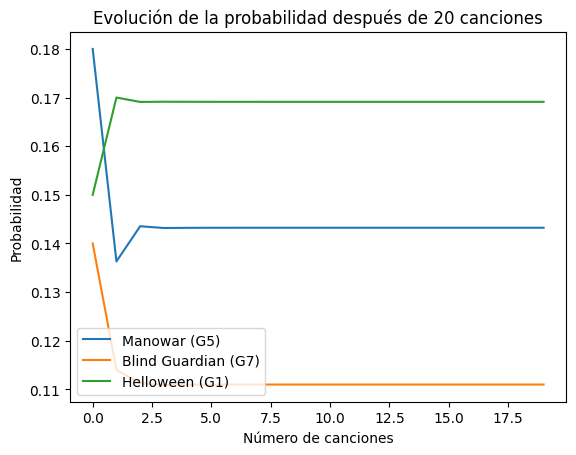

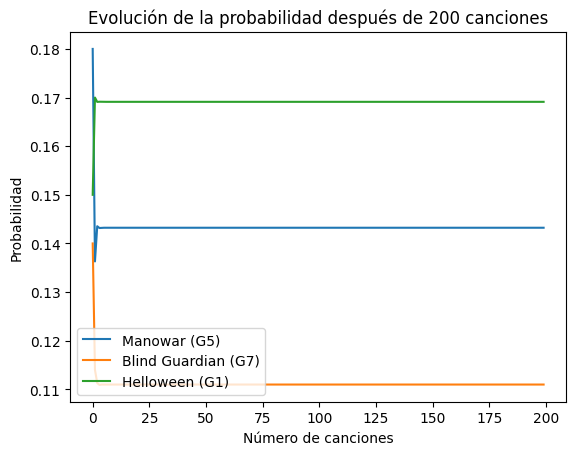

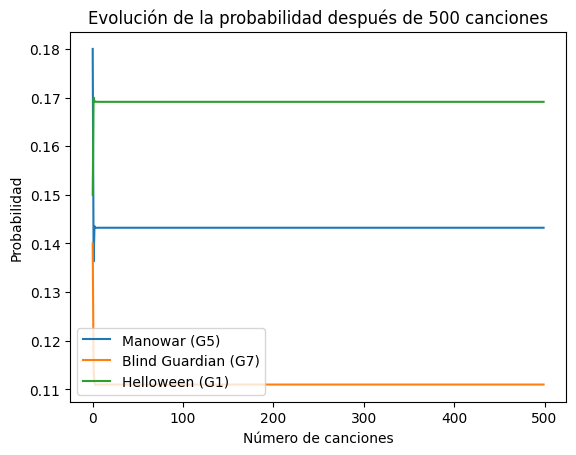

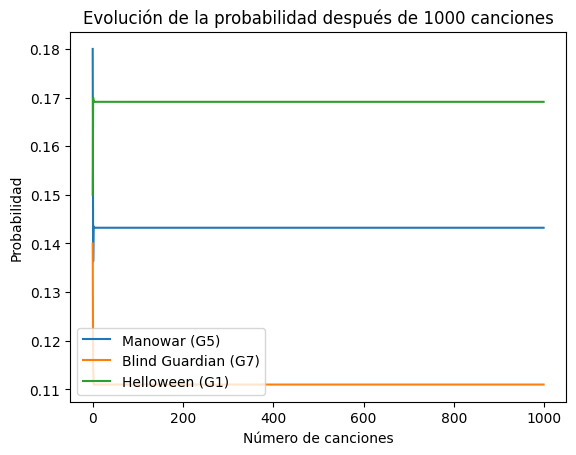

In [31]:
# Gráficos
# a)

for pasos in veinte_pasos:
    probabilidades = evolucion_cadena_markov(estado_inicial, matriz, pasos)

    plt.figure()
    plt.plot(probabilidades[:, 4], label='Manowar (G5)')
    plt.plot(probabilidades[:, 6], label='Blind Guardian (G7)')
    plt.plot(probabilidades[:, 0], label='Helloween (G1)')
    plt.title(f'Evolución de la probabilidad después de {pasos} canciones')
    plt.xlabel('Número de canciones')
    plt.ylabel('Probabilidad')
    plt.legend()
    plt.show()

for pasos in lista_pasos:
    probabilidades = evolucion_cadena_markov(estado_inicial, matriz, pasos)

    plt.figure()
    plt.plot(probabilidades[:, 4], label='Manowar (G5)')
    plt.plot(probabilidades[:, 6], label='Blind Guardian (G7)')
    plt.plot(probabilidades[:, 0], label='Helloween (G1)')
    plt.title(f'Evolución de la probabilidad después de {pasos} canciones')
    plt.xlabel('Número de canciones')
    plt.ylabel('Probabilidad')
    plt.legend()
    plt.show()

In [35]:
# Encontrar el estado estacionario de la cadena de Markov de manera analítica utilizando NumPy.
# Crear la matriz A = (P - I)^T
A = (matriz - np.identity(8)).T

# Añadir una fila para la condición de que la suma de las probabilidades sea 1
A = np.vstack([A, np.ones(8)])

# Crear el vector b, que contiene ceros y termina con un 1
b = np.zeros(9)
b[-1] = 1

# Resolver el sistema de ecuaciones
pi = np.linalg.lstsq(A, b, rcond=None)[0]

print("Estado estacionario de Manowar (G5):       \033[94m{}\033[0m".format(pi[4]))  # Azul
print("Estado estacionario de Blind Wardian (G7): \033[91m{}\033[0m".format(pi[6]))  # Rojo
print("Estado estacionario de Helloween (G1):     \033[92m{}\033[0m".format(pi[0]))  # Verde

print("El vector de estado estacionario es: ")
for i, elemento in enumerate(pi):
    if i == 0:
        print(f"\033[92m{elemento}\033[0m")  # verde
    elif i == 4:
        print(f"\033[94m{elemento}\033[0m")  # azul
    elif i == 6:
        print(f"\033[91m{elemento}\033[0m")  # Rojo
    else:
        print(elemento)




Estado estacionario de Manowar (G5):       0.14322864742559516
Estado estacionario de Blind Wardian (G7): 0.11098677815624744
Estado estacionario de Helloween (G1):     0.16912007137246707
El vector de estado estacionario es: 
0.16912007137246707
0.13528795366481816
0.09393660369386797
0.10524765611899195
0.14322864742559516
0.12065995705244137
0.11098677815624744
0.12153233251557108


b)
*Determinar el estado estacionario de la cadena de Markov de manera analítica, esto es, a través del sistema de ecuaciones visto en clases.
Compare y analice sus resultados con la parte (a).*

Para encontrar el estado estacionario de una cadena de Markov, debemos resolver el sistema de ecuaciones lineales \( πP = π \), donde \( π \) es el vector de estado estacionario y \( P \) es la matriz de transición. La suma de todas las probabilidades en \( π \) debe ser igual a 1.

Las ecuaciones para encontrar el estado estacionario son:  
\begin{align*}  \pi = [\pi_1, \pi_2, \pi_3, \pi_4, \pi_5, \pi_6, \pi_7, \pi_8]
\end{align*}


\begin{align*}
\pi_1 &= 0.27\pi_1 + 0.17\pi_2 + 0.15\pi_3 + 0.19\pi_4 + 0.11\pi_5 + 0.07\pi_6 + 0.15\pi_7 + 0.21\pi_8 \\
\pi_2 &= 0.13\pi_1 + 0.18\pi_2 + 0.13\pi_3 + 0.11\pi_4 + 0.20\pi_5 + 0.12\pi_6 + 0.10\pi_7 + 0.09\pi_8 \\
\pi_3 &= 0.09\pi_1 + 0.00\pi_2 + 0.05\pi_3 + 0.15\pi_4 + 0.17\pi_5 + 0.11\pi_6 + 0.12\pi_7 + 0.06\pi_8 \\
\pi_4 &= 0.02\pi_1 + 0.15\pi_2 + 0.07\pi_3 + 0.15\pi_4 + 0.14\pi_5 + 0.12\pi_6 + 0.08\pi_7 + 0.13\pi_8 \\
\pi_5 &= 0.10\pi_1 + 0.14\pi_2 + 0.11\pi_3 + 0.12\pi_4 + 0.18\pi_5 + 0.27\pi_6 + 0.18\pi_7 + 0.05\pi_8 \\
\pi_6 &= 0.11\pi_1 + 0.13\pi_2 + 0.19\pi_3 + 0.11\pi_4 + 0.11\pi_5 + 0.09\pi_6 + 0.07\pi_7 + 0.17\pi_8 \\
\pi_7 &= 0.15\pi_1 + 0.12\pi_2 + 0.19\pi_3 + 0.12\pi_4 + 0.07\pi_5 + 0.03\pi_6 + 0.14\pi_7 + 0.08\pi_8 \\
\pi_8 &= 0.13\pi_1 + 0.11\pi_2 + 0.11\pi_3 + 0.05\pi_4 + 0.02\pi_5 + 0.09\pi_6 + 0.16\pi_7 + 0.21\pi_8 \\
\end{align*}


Y la ecuación adicional para la suma de las probabilidades:
\begin{align*}
\pi_1 + \pi_2 + \pi_3 + \pi_4 + \pi_5 + \pi_6 + \pi_7 + \pi_8 = 1
\end{align*}

Resolviendo este sistema de ecuaciones, obtendremos el vector de estado estacionario π.

**COMPARACION Y ANÁLISIS DE RESUTADOS**

**Código 1: Método Iterativo (evolucion_cadena_markov())**  
Este código utiliza un método iterativo para calcular el estado estacionario.   
Comienza con un estado inicial y aplica repetidamente la matriz de transición para actualizar el estado.  
Después de un número suficiente de iteraciones, el estado converge al estado estacionario.  
Aunque funcional para matrices relativamente pequeñas, este método puede ser lento para matrices grandes o para cadenas que tardan mucho en converger, ya que al tener muchas columnas, aumentan las dimensiones.

**Código 2: Método Analítico**  
Este código utiliza álgebra lineal a través de la biblioteca NumPy para encontrar analíticamente el estado estacionario de una cadena de Markov. El código resuelve directamente un sistema de ecuaciones lineales formado por la matriz de transición y una condición adicional que asegura que la suma de las probabilidades sea 1.   
Este enfoque ofrece una solución exacta y es generalmente rápido para matrices de tamaño moderado o sin muchas dimensiones.

**Comparación y Análisis**  
Los resultados de ambos métodos son esencialmente los mismos, lo que corresponde a una validación de que ambos métodos son correctos. La pequeña diferencia en los últimos decimales es probablemente debido a errores numéricos en los cálculos de punto flotante.

Finalmente, tanto el enfoque iterativo como el analítico son formas legítimas de determinar el estado estacionario en una cadena de Markov. La selección entre los dos dependerá de varios factores, incluyendo la rapidez con la que necesitas la respuesta, el nivel de exactitud que buscas, y cuánto se entiende sobre álgebra lineal.